<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210707.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 딥러닝 & 강화학습

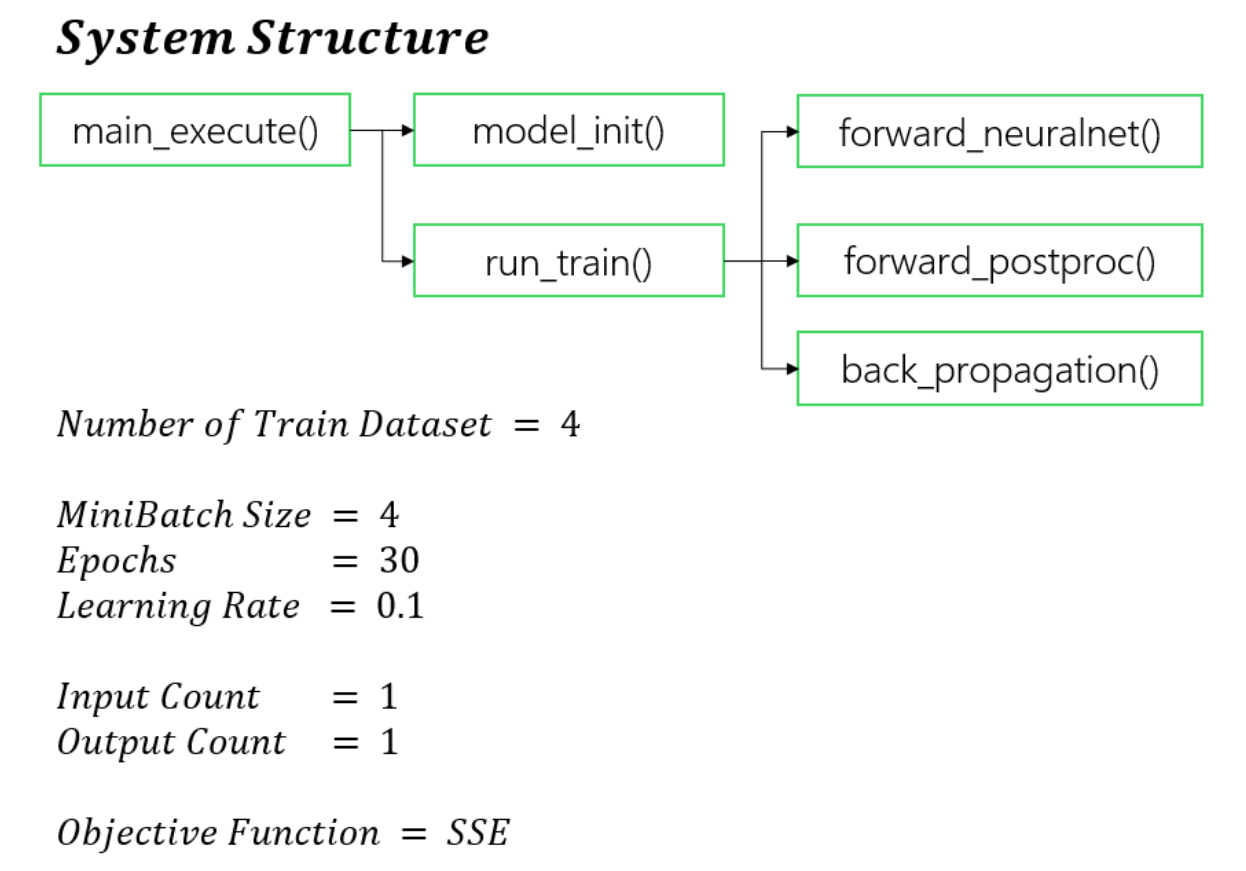

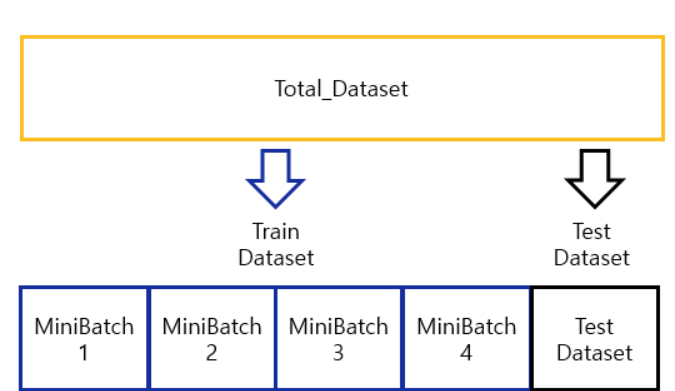

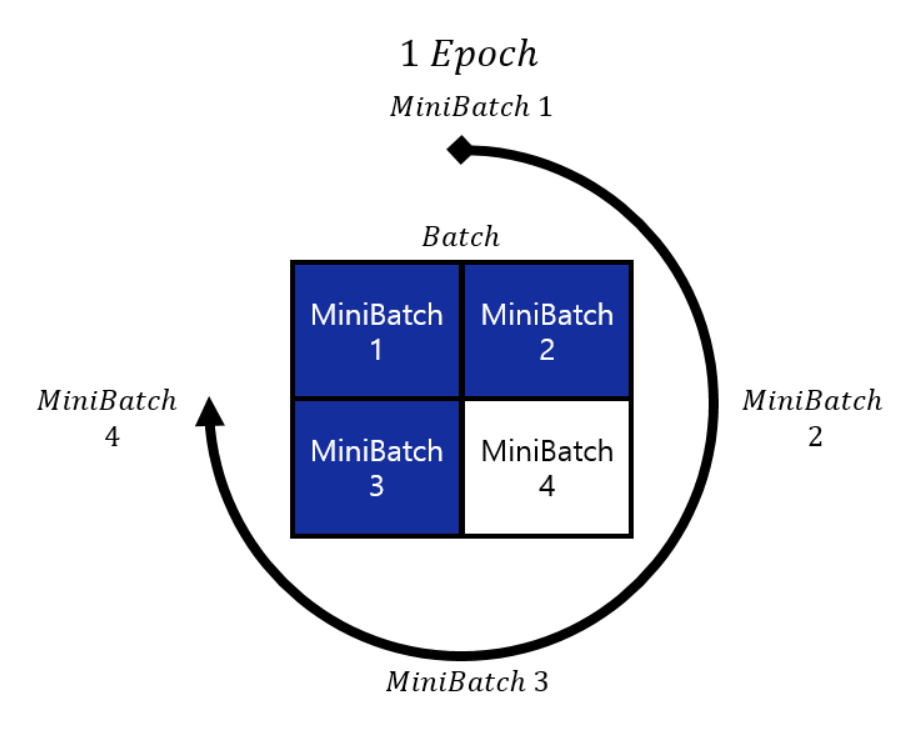

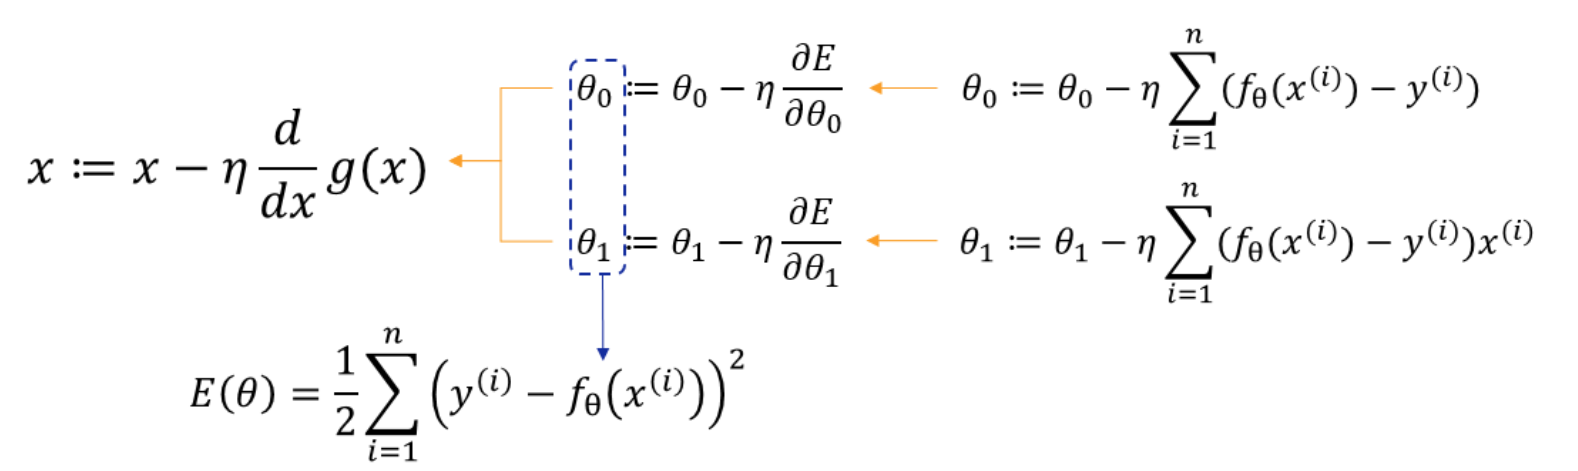

In [ ]:
import numpy as np

x = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

RND_STD = 1
RND_MEAN = 0

input_cnt = 1     #독립변수
output_cnt = 1    #종속변수

def main_execute(x, y, epoch_count, report, lr=0.001):
  init_model()
  sse_row, theta_0_row, theta_1_row = run_train(x, y, epoch_count, report, lr)
  return sse_row, theta_0_row, theta_1_row

def init_model():
  global theta_0, theta_1
  theta_0 = np.random.normal(RND_MEAN, RND_STD, [output_cnt])
  theta_1 = np.random.normal(RND_MEAN, RND_STD, [input_cnt, output_cnt])

def run_train(x, y, epoch_count, report, lr):
  print("Initial theta_0 : {}".format(theta_0))
  print("Initial theta_1 : {}".format(theta_1))
  
  sse_row=[]
  theta_0_row=[]
  theta_1_row=[]

  for epoch in range(epoch_count):
    y_hat = forward_neuralnet(x)
    sse = forward_postproc(y_hat, y_label_total) 
    sse_row.append(sse)
    back_propagation(y_hat, lr)       

    theta_0_row.append(theta_0)
    theta_1_row.append(theta_1)

    if report>0 and epoch % report==0:
      print('Epoch - {}'.format(epoch+1))
      print('SSE : {}'.format(sse))

  print("=============================================")
  print('Final SSE : {}'.format(sse))

  return sse_row, theta_0_row, theta_1_row

def forward_neuralnet(x):
  y_hat = theta_0 + theta_1*x
  return y_hat

def forward_postproc(output, y):        #손실함수 연산
  diff = output - y
  square = np.square(diff)
  sse = 1/2*(np.sum(square))
  return sse

def back_propagation(y_hat, lr):        
  global theta_0, theta_1
  theta_0 = theta_0 - lr*(np.sum(y_hat - y_label_total))
  theta_1 = theta_1 - lr*(np.sum(y_hat - y_label_total)*x


In [ ]:
epoch_count = 10
report = 3
for epoch in range(epoch_count):
  result = epoch % report
  print(result)

0
1
2
0
1
2
0
1
2
0


In [ ]:
init_model()
print(theta_0, theta_1)

[-0.06176983] [[-0.29784332]]


In [ ]:
sse_row, theta_0_row, theta_1_row = main_execute(x, y_label_total, epoch_count=10, report = 2, lr = 0.000000000001)

Initial theta_0 : [0.35707011]
Initial theta_1 : [[-0.54932132]]
Epoch - 1
SSE : 1242865.4328899137
Epoch - 3
SSE : 1242854.3957911294
Epoch - 5
SSE : 1242843.3587912896
Epoch - 7
SSE : 1242832.3218903928
Epoch - 9
SSE : 1242821.285088438
Final SSE : 1242815.7667245637


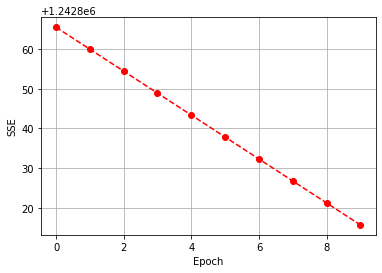

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sse_row, '--o', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [ ]:
theta_1 = np.random.normal(RND_MEAN, RND_STD, [2,1])
print(theta_1)

[[ 1.35263556]
 [-0.18540718]]


#2. 머신러닝

###데이터 수집

### 수집 데이터 형태

* 정형 – 일정한 규격에 맞춰서 구성된 데이터 (어떠한 역할을 알고 있는 데이터)
 * 관계형 데이터베이스 시스템의 테이블과 같이 고정된 컬럼에 저장되는 데이터 파일 등이 될 수 있다.
     즉, 구조화 된 데이터가 정형 데이터

* 반정형 – 일정한 규격으로 구성되어 있지 않지만 일정한 틀을 갖추기 위해서 태그나 인덱스형태로 구성된 데이터
 * 연산이 불가능한 데이터
     ex) XML. HTML, JSON 등

* 비정형 – 구조화 되지 않는 형태의 데이터 (정형과 반대로 어떠한 역할인지 알수 없는 데이터)
 * 형태가 없으며, 연산도 불가능한 데이터
     ex) SNS, 영상, 이미지, 음성, 텍스트 등


우리가 주로 수집할 데이터들은 반정형 혹은 비정형 데이터라고 보면 된다.


### 스크레이핑, 크롤링
- Scraping: 웹 사이트의 특정 정보를 추출하는 것. 웹 데이터의 구조 분석이 필요
- 로그인이 필요한 경우가 많다
- Crawling: 프로그램이 웹사이트를 정기적으로 돌며 정보를 추출하는 것 (이러한 프로그램을 크롤러, 스파이더라고 한다)



### 웹 크롤러 (Web Crawler)

* 인터넷에 있는 웹 페이지로 이동해서 데이터를 수집하는 프로그램
* 크롤러 = 스크래퍼, 봇, 지능 에이전트, 스파이더 등으로 불림


### 웹 크롤링을 위해 알아둘 것

* Web 구조
 * 클라이언트 = 서버에 정보 또는 서비스를 요청하는 컴퓨터/소프트웨어/사용자 ex) 웹브라우저
 * 서버 = 정보를 보관하고 클라이언트가 요청한 정보 서비스를 제공해주는 컴퓨터/소프트웨어 ex) 영상, 파일, 채팅, 게임, 웹서버

* URL 구조
 * http://192.168.0.10:9000/WebProject?msg=Hello
  * 웹 문서를 교환하기 위한 규칙
  * 주소 또는 IP
  * 포트번호
  * 리소스 경로
  * 쿼리스트링

* 데이터 전송 방식
 * GET, POST  (대표적인 2가지)

* 패킷(Packet) 형식
 * 요청패킷:
  클라이언트에서 필요한 헤더 Key/Value를 세팅한 후 요청, 전달
 * 응답패킷:
  서버에 필요한 Key/Value를 세팅한 후, 응답, 전달



URI

url  :  웹  기본 80포트  


In [ ]:
#w3school.com

* 웹 페이지 구성 3요소
 * HTML, CSS, Javascript
 * HTML: Tag, Element, Attribute, Content
 * CSS : 선택자 { 스타일 속성 : 스타일 값; }
  - 선택자(셀렉터) : tag, id, class
 * Javascript :Web Page에서 어떤 동작에 대한 반응이 일어날 수 있도록 해주는 언어
  - DOM (Document Object Model) : 문서를 객체로 조작하기 위한 표준 모델. HTML 문서를 객체로 표현할 때 사용하는 API


* 데이터 추출 방법
 * 웹 페이지를 방문하고 크롤링하려는 단어나 문구를 검색하여 찾아낸 정보를 수집하여 기록
 * 이때 파일로 기록해서 저장하거나 데이터베이스에 저장 (저장하는 과정에서 단어나 문구와 연관된 결과 값에 인덱스를 부여)

* 웹 크롤링을 위한 라이브러리
 * requests: 접근할 웹 페이지의 데이터를 
요청/응답받기 위한 라이브러리
 * BeautifulSoup : 응답받은 데이터 중 원하는 데이터를 추출하기 위한 라이브러리




### urllib 사용법
- url 관련 데이터를 처리하는 라이브러리
- http 또는 ftp를 사용해 데이터를 다운로드 받는데 사용

#### 웹에서 파일 다운로드하기

In [ ]:
import requests as req
res = req.get('https://www.google.com')  #response 200번대면 잘 연결된것. 400이면 주소 오류일 수도 있다.
# res.text

In [ ]:
url='https://www.naver.com'
res=req.get(url)
res

<Response [200]>

In [ ]:
url='https://search.naver.com/search.naver'
res = req.get(url, params={'query':'정보처리기사'})
# res.text

In [ ]:
#다른프로그램에서 링크를 들어가는게 안되는 페이지
#headers로 해결
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36',
        'referer':'https://nid.naver.com/login/sso/finalize.nhn?url=https%3A%2F%2Fwww.naver.com&sid=KBwWbyEJdJL521l3&svctype=1'}

url = 'https://prod.danawa.com/list/?cate=11229515&logger_kw=ca_main_more'
res = req.get(url, headers=headers)
# res.text

In [ ]:
#json 읽는법
import json
from pandas.io.json import json_normalize

url = 'http://rank.search.naver.com/rank.js'
res = req.get(url)
json_normalize(json.loads(res.text), ['data', 'data'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,rank,keyword,change,score,tvalue,cvalue,ratio,delta
0,1,-,+,0,0,0,.,0
1,2,-,+,0,0,0,.,0
2,3,-,+,0,0,0,.,0
3,4,-,+,0,0,0,.,0
4,5,-,+,0,0,0,.,0
5,6,-,+,0,0,0,.,0
6,7,-,+,0,0,0,.,0
7,8,-,+,0,0,0,.,0
8,9,-,+,0,0,0,.,0
9,10,-,+,0,0,0,.,0


In [ ]:
#이미지 가져오기
import urllib.request
url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"
urllib.request.urlretrieve(url, 'test.png')

('test.png', <http.client.HTTPMessage at 0x7efebf317ad0>)

#### urlopen() 사용법
- 위의 urlretrive()는 데이터를 파일에 바로 저장하였다.
- urlopen()을 사용하면 데이터를 파이선에서 읽을 수 있다.

In [ ]:
png = urllib.request.urlopen(url).read()
with open('test2.png','wb')as f:
  f.write(png)

#### 웹 API 이용하기
- 클라이언트정보를 보여주는 샘플 api 사이트 접속

In [ ]:
url = "http://api.aoikujira.com/ip/ini"
res = urllib.request.urlretrieve(url)

####  GET  요청을 사용하여 파라미터를 보내는 경우
- URL 끝 부분에 ?를 입력하고 key = value 형식으로 매개변수를 추가한다. 여러개의 파라미터를 넣는 경우 &를 사용하여 구분한다
- 한글 등이 파라미터로 사용될 때는 반드시 이러한 코딩을 해주어야 한다

In [ ]:
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
res = urllib.request.urlopen(url)
data = res.read()
text = data.decode('utf-8')
# text

###스크레이핑 : 웹에서 원하는 정보를 추출하는 것  
HTML과 XML 문서에서 정보를 추출할 수 있다

### BeautifulSoup 라이브러리

HTML 문자열을 파이썬에서 사용 가능한 객체로 변환

BeautifulSoup( markup, parser )

* markup : requests로 요청/응답 받은 변수
* parser : 원시 코드인 순수 문자열 객체를 해석할 수 있도록 분석  
 - 문자열을 파이썬에서 사용할 수 있도록 해석해주는 프로그램 (lxml, html.parser, html5lib)


데이터를 추출하기 위한 속성

|속성|설명|
|-|-|
|text|하위 태그에 대한 값 전부 출력|
|string|정확히 태그에 대한 값만 출력|

원하는 요소 접근하는 메소드

|메소드|설명|
|-|-|
|find(tag),
 find(tag, id=값),
 find(tag, class=값), 
 find(tag, attr{속성:속성값})|원하는 태그를 하나만 반환|
|find_all(),
 find_all(tag, limit=숫자)|원하는 태그를 리스트 형태로 반환|
|select(CSS Selector)|CSS Selector를 활용하여 원하는 태그를 리스트 형태로 반환|
|extract()|태그를 지우는 기능|



In [ ]:
# !pip3 install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup
html="""
<html><body>
  <h1> 파이썬으로 웹문서 읽기 </h1>
  <p> 페이지 분석기능 </p>
  <p> 페이지 정렬 </p>
</body></html>
"""
soup = BeautifulSoup(html, 'html.parser')
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling
print(h1)
print(p1)
print(p2)

<h1> 파이썬으로 웹문서 읽기 </h1>
<p> 페이지 분석기능 </p>
<p> 페이지 정렬 </p>


#### id 를 사용하는 방법
- 위와 같이 내부 구조를 일일이 파악하고 코딩하는 것은 복잡하다
- find()를 사용하여 간단히 원하는 항목을 찾을 수 있다

In [ ]:
from bs4 import BeautifulSoup
html="""
<html><body>
  <h1 id='title'> 파이썬으로 웹문서 읽기 </h1>
  <p id='p1'> 페이지 분석기능 </p>
  <p id='p2'> 페이지 정렬 </p>
</body></html>
"""
soup = BeautifulSoup(html, 'html.parser')
h1 = soup.find(id='title')
p1 = soup.find(id='p1')
p2 = soup.find(id='p2')
print(h1.string)
print(p1)
print(p2)

 파이썬으로 웹문서 읽기 
<p id="p1"> 페이지 분석기능 </p>
<p id="p2"> 페이지 정렬 </p>


In [ ]:
#find_all()을 이용하는 경우
html = '''
<html><body>
  <ul>
    <li><a href='http://www.naver.com'> naver  </a></li>
    <li><a href='http://www.daum.net'> daum   </a></li>
  </ul>
</html></body>
'''

soup=BeautifulSoup(html, 'html.parser')
links = soup.find_all('a')
for a in links:
  href = a.attrs['href']
  print(href)
  
print(links[0].string)
links[0].attrs    #attribute약자

http://www.naver.com
http://www.daum.net
 naver  


{'href': 'http://www.naver.com'}

### DOM 요소 파악하기
- Document Object Model: XML이나 HTML 요소에 접근하는 구조를 나타낸다
- DOM 요소의 속성이란 태그 뒤에 나오는 속성을 말한다 <a> 태그의 속성은 href이다

In [ ]:
soup.html.body.ul
soup.prettify()

'<html>\n <body>\n  <ul>\n   <li>\n    <a href="http://www.naver.com">\n     naver\n    </a>\n   </li>\n   <li>\n    <a href="http://www.daum.net">\n     daum\n    </a>\n   </li>\n  </ul>\n </body>\n</html>\n'

### urlopen() 사용 하기

In [ ]:
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
res = urllib.request.urlopen(url)

soup = BeautifulSoup(res, 'html.parser')

title = soup.find('title').string
wf = soup.find('wf').string
print(title)
print('-'*30)
print(wf)

기상청 육상 중기예보
------------------------------
○ (강수) 제주도는 10일(토)~11일(일) 비가 오겠습니다. <br />          10일(토)과 11일(일) 오후에는 전국(강원영동 제외), 12일(월) 오후에는 중부지방(강원영동 제외)에 비가 오겠습니다.<br />○ (기온) 이번 예보기간 아침 기온은 22~25도, 낮 기온은 27~34도로 어제(6일, 아침최저기온 21~24도, 낮최고기온 23~31도)보다 높겠습니다.<br />○ (주말전망) 10일(토)~11일(일)은 전국이 구름많고 오후에 비가 오겠습니다. 아침 기온은 22~24도, 낮 기온은 28~32도가 되겠습니다.<br /> <br />* 오랜 기간 비가 이어지면서 지반이 약해져 축대붕괴, 산사태 등의 피해가 우려되니, 사전에 철저히 대비하기 바랍니다.<br />* 이번 예보기간 동안 북태평양고기압의 확장 정도와 정체전선의 위치에 따라 강수 변동성이 크겠으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


### CSS 선택자 사용하기
- CSS 선택자를 사용해서 원하는 요소를 추출할 수 있다.
- h1 과 li 태그를 추출하는 코드

In [ ]:
html='''
<html><body>
  <div id='books'>
    <h1> 위키북스 도서 </h1>
    <ul class='item'>
      <li> 게임 입문 </li>
      <li> 파이썬 입문 </li>
      <li> 웹 디자인 입문 </li>
    </ul>
  </div>
</html></body>
'''

soup = BeautifulSoup(html, 'html.parser')
h1 = soup.select_one('div#books > h1')            #id는 샵으로 표시
li_list = soup.select('div#books > ul.item > li')

print(h1)
print(li_list)

<h1> 위키북스 도서 </h1>
[<li> 게임 입문 </li>, <li> 파이썬 입문 </li>, <li> 웹 디자인 입문 </li>]


### CSS 자세히 알아보기
- 웹 페이지의 검사 메뉴를 선택 (우측 버튼)
- 특정 태그를 선택하고 다시 우측 버튼을 누르고 Copy - Copy selector를 선택하면 CSS 선택자가 클립보드에 저장된다 (아래 예시)

#mw-content-text > div > ul:nth-child(6) > li > b > a

- 위에서 nth-child(6)은 6번째에 있는 요소를 가리킨다
- 이를 기반으로 작품목록을 가져오는 프로그램을 작성하겠다.


In [ ]:
url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
res = urllib.request.urlopen(url)

soup = BeautifulSoup(res, 'html.parser')
A = soup.select('div > ul > li > a')
B = soup.find('li')
#mw-content-text > div.mw-parser-output > ul:nth-child(6) > li > b > a
#mw-content-text > div.mw-parser-output > ul:nth-child(6) > li > ul > li:nth-child(1) > a

a_list = soup.select('#mw-content-text > div > ul a')
for t in a_list:
  print( t.string )

하늘과 바람과 별과 시
증보판
서시
자화상
소년
눈 오는 지도
돌아와 보는 밤
병원
새로운 길
간판 없는 거리
태초의 아침
또 태초의 아침
새벽이 올 때까지
무서운 시간
십자가
바람이 불어
슬픈 족속
눈감고 간다
또 다른 고향
길
별 헤는 밤
흰 그림자
사랑스런 추억
흐르는 거리
쉽게 씌어진 시
봄
참회록
간(肝)
위로
팔복
못자는밤
달같이
고추밭
아우의 인상화
사랑의 전당
이적
비오는 밤
산골물
유언
창
바다
비로봉
산협의 오후
명상
소낙비
한난계
풍경
달밤
장
밤
황혼이 바다가 되어
아침
빨래
꿈은 깨어지고
산림
이런날
산상
양지쪽
닭
가슴 1
가슴 2
비둘기
황혼
남쪽 하늘
창공
거리에서
삶과 죽음
초한대
산울림
해바라기 얼굴
귀뚜라미와 나와
애기의 새벽
햇빛·바람
반디불
둘 다
거짓부리
눈
참새
버선본
편지
봄
무얼 먹구 사나
굴뚝
햇비
빗자루
기왓장 내외
오줌싸개 지도
병아리
조개껍질
겨울
트루게네프의 언덕
달을 쏘다
별똥 떨어진 데
화원에 꽃이 핀다
종시


#3. 빅데이터 분석

###SQL 함수  
SQL은 1부터 센다 (ex : python은 0부터

In [ ]:
#문자열 함수
x || y : 문자열 x와 y연결
SELECT Code || ' = ' || Name FROM Country;

LENGTH(x) : 문자열 x의 길이
SELECT Name, LENGTH(Name) FROM Country;

SUBSTR(x,n,m) : x=문자열, n=시작 위치, m =반환 문자 개수
SELECT Name, SUBSTR(Name,1,3) FROM Country;     #첫번째 위치에서 세자리 반환

TRIM(x) : 문자열 x에서 스페이스 제거
TRIM(x,y) : 문자열 x에서 문자 y 제거
LTRIM(),RTRIM() : TRIM()과 유사, 단 left 또는 right에 국한되게 문자 제거
SELECT TRIM("   <===>    ");   

UPPER(x),LOWER(x) : 문자열 x의 대문자화 또는 소문자화
SELECT Name, UPPER(Name) FROM Country; 
SELECT Name, LOWER(Name) FROM Country; 

REPLACE(x,y,z) : 문자열 x에서 패턴 y를 패턴 z로 대체

In [ ]:
#집계(aggregation)하지 않는 계산용 함수와 연산자
SELECT ROUND(Population/SurfaceArea,0) AS PopDensity FROM Country;    #나누기 & 반올림.
SELECT 7 % 4;				  	      #x%y : 나머지.
SELECT ABS(-123);				  	 #ABS(x) : 절대값.
SELECT ROUND(123.456789, 3);           #ROUND(x,n) : x소수점 이하 n자리까지 , 반올림.

In [ ]:
#집계 함수와 순위 함수를 통 털어서 윈도우 함수 (Window Function)라 부른다.
#집계 (aggregation) 함수.
SELECT COUNT(*) FROM Country;                  #행수 카운트.
SELECT COUNT(Population) FROM Country;     		#NULL이 아닌 Population 값의 개수.
SELECT Continent, COUNT(*) FROM Country GROUP BY Continent;  	# 대륙별 국가의 수.
SELECT Region, COUNT(*) FROM Country GROUP BY Region;  	# Region별 국가의 수.
SELECT COUNT(DISTINCT Continent) FROM Country;     		# 고유한 대륙의 개수. 

SUM(X) : 그룹별 X컬럼의 합을 구해준다.
AVG(X) : 그룹별 X컬럼의 평균을 구해준다.
SELECT AVG(Population) FROM Country WHERE Region = 'Western Europe';  	# 서유럽 지역의 국가의 인구 평균.

MIN(x),MAX(X) : 그룹별 X컬럼의 최소값, 최대값 계산
SELECT MIN(Population), MAX(Population) FROM Country WHERE Region = 'Western Europe';    

In [ ]:
# 날짜와 시간 관련 함수. 
SELECT DATE('now');		#현재 날짜.
SELECT TIME('now');		#현재 시각. 
SELECT DATETIME('now');		#날짜와 시각.
SELECT STRFTIME('%Y', 'now');		# 연도
SELECT STRFTIME('%m', 'now');	  # 월(1~12)
SELECT STRFTIME('%d', 'now');		# 일
SELECT STRFTIME('%w', 'now');   # 요일(0~6,0=일요일)	 
SELECT STRFTIME('%s', 'now');   # 초

In [ ]:
import sqlite3
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현 폴더의 위치를 보여준다.
!pwd        # Linux

/content/drive/MyDrive/광인사/01_SQL과 데이터 베이스_배포/database


In [ ]:
# 작업 폴더로 이동한다.
# 데이터 파일은 이미 올려져 있어야 한다.
os.chdir("/content/drive/MyDrive/광인사/01_SQL과 데이터 베이스_배포/database/")

In [ ]:
# 현 폴더의 내용을 보여준다.
!ls

practice.db  scratch.db  world.db


In [ ]:
# SQLite 에 연결 & Cursor 생성.
os.chdir("../database/")
conn = sqlite3.connect("world.db")
cur = conn.cursor()

In [ ]:
# MySQL 행 가져오기.
sql = "SELECT Name, Code, Region, Population FROM Country ORDER BY Population DESC;"
cur.execute(sql);
res = cur.fetchall()      #data를 tuple형태로 list에 저장

In [ ]:
# 자료형은 List of tuples.
print(type(res))
print(type(res[0]))

<class 'list'>
<class 'tuple'>


In [ ]:
for x in res:
    print(x)

# ('China', 'CHN', 'Eastern Asia', 1277558000)
# ('India', 'IND', 'Southern and Central Asia', 1013662000)
# ('United States', 'USA', 'North America', 278357000)
# ('Indonesia', 'IDN', 'Southeast Asia', 212107000)
# ('Brazil', 'BRA', 'South America', 170115000)
# ('Pakistan', 'PAK', 'Southern and Central Asia', 156483000)
# ('Russian Federation', 'RUS', 'Eastern Europe', 146934000)
# ('Bangladesh', 'BGD', 'Southern and Central Asia', 129155000)
# ('Japan', 'JPN', 'Eastern Asia', 126714000)
# ('Nigeria', 'NGA', 'Western Africa', 111506000)
# ('Mexico', 'MEX', 'Central America', 98881000)
# ('Germany', 'DEU', 'Western Europe', 82164700)

In [ ]:
conn.close()

In [ ]:
# SQLite 에 연결 & Cursor 생성.
os.chdir("../database")       #현재 디렉토리를 새로운 위치의 디렉토리로 변경한다.
conn = sqlite3.connect("scratch.db")
cur = conn.cursor()         #커서는 내장 SQL문의 수행결과로 반환될 수 있는 복수의 튜플들을 액세스 할 수 있도록 해주는 개념


In [ ]:
# MySQL 테이블 생성.
sql = "CREATE TABLE IF NOT EXISTS test ( a INT, b TEXT, c TEXT );"
cur.execute(sql);     #SQL문 실행
conn.commit();      #모든 작업을 정상적으로 처리하겠다고 확정하는 명령어

In [ ]:
# "test" 테이블에 행 추가.
sql = "INSERT INTO test VALUES ( ?, ?, ? );"      # ?를 placeholder로 사용!
x = [1, "Hello", "World"]                        # 삽입될 내용.
cur.execute(sql,x);                                # 실행!
conn.commit();

In [ ]:
# "test" 테이블에 행 계속 추가.
sqls = ["INSERT INTO test VALUES ( 2, 'This', 'Right here!' );", 
        "INSERT INTO test ( b, c ) VALUES ( 'That', 'Over there!' );",
        "INSERT INTO test ( a, b, c ) SELECT id, name, description FROM item;"] 
for a_sql in sqls:
    cur.execute(a_sql);
    conn.commit();

In [ ]:
# 테이블 내용 보기.
sql = "SELECT * FROM test"
cur.execute(sql);
res = cur.fetchall()    #fetch all -> 레코드를 배열형식으로 저장해준다.
for x in res:
    print(x)

(1, 'Hello', 'World')
(2, 'This', 'Right here!')
(None, 'That', 'Over there!')
(1, 'Box of 64 Pixels', '64 RGB pixels in a decorative box')
(2, 'Sense of Humor', 'Especially dry. Imported from England.')
(3, 'Beauty', 'Inner beauty. No cosmetic surgery required!')
(4, 'Bar Code', 'Unused. In original packaging.')


In [ ]:
sql = "DROP TABLE test;"
cur.execute(sql);
conn.commit()

In [ ]:
conn.close()

In [ ]:
##2
#python에는 SQLite가 이미 설치되어 있다.(Colab or Anaconda)
#커서(cursor)객체를 만들고 SQL 커맨드를 쉽게 처리할 수 있다.
import sqlite3
conn=sqlite3.connect('customer.db')    #경로를 잘못 적어도 열린다(새로 생성된다) 주의!
cur=conn.cursor()                     #커서 객체
cur.execute("""CREATE TABLE customers(
  first_name  text, last_name text, email text
)""")                                   #Multi-line
conn.commit()  #변화가 있는 경우만 commit
conn.close()   #닫아야만 파일이 저장됨, 데이터 베이스 연결 종료

In [ ]:
import sqlite3
conn = sqlite3.connect('customer.db')
curr=conn.cursor()
sql = "INSERT INTO test VALUES (?,?,?);"      #?를 placeholder로 사용
x = [2,"This","That"]                         #삽입될 행(list 또는 tuple)
cur.execute(sql,x)                            #실행
conn.commit()
conn.close()

#4. 취업멘토링

박수빈 강사님  
* 스토리 3단계 공식화하기
1. 구체적으로 어떤 경험을 했나?(상세한 설명  필요)
2. 그 경험을 통해 얼마만큼 성장했나?(교훈 및 이득)
3. 그 경험이 우리 회사에서 발휘될 수 있을까?(능력)  
경험, 능력, 발휘


<자기소개서 작성>   
* 두괄식 : 중요 핵심은 첫 문장에 넣는다.
* one-point : 주제의 메시지를 전하는 것  
* 흥미가 유발되는 표제(반어적 기법, 모순되는 말을 조합하면 흥미가 추가) 내용을 읽으면 제목이 이해되는 것도 좋다.  
* 베스트셀러의 목차에서도 활용 가능  
* 말을 짧게하면 임팩트가 크기 때문에 장점은 짧고, 단점은 길고 적게(나한테만 단점인 부분으로)  
* 시각화 기법